# Bike Sharing **Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Gathering **Data**

In [ ]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Dustedix/bike-sharing/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/Dustedix/bike-sharing/main/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data **Asessment**

# Menilai Data Day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_df.duplicated().sum()

0

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Menilai Data Hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour_df.duplicated().sum()

0

# Data **Cleaning**

# **Mengubah Tipe Data Date Time pada Day_df**

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Mengubah Tipe Data Date Time pada hour_df**

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Mengubah Beberapa Nama Kolom pada day_df dan hour_df

In [ ]:
day_df.rename(columns={
    'instant':'record_id',
    'yr':'year',
    'dteday':'datetime',
    'mnth':'month',
    'hum':'humidity',
    'weathersit':'weather_condition',
    'cnt':'total_count'
},inplace=True)

In [ ]:
day_df.tail()

,record_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
hour_df.rename(columns={
    'instant':'record_id',
    'yr':'year',
    'dteday':'datetime',
    'mnth':'month',
    'hum':'humidity',
    'weathersit':'weather_condition',
    'hr':'hour',
    'cnt':'total_count'
},inplace=True)

In [ ]:
hour_df.tail(25)

,record_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
17354,17355,2012-12-30,1,1,12,23,0,0,0,1,0.20,0.1970,0.51,0.2239,10,39,49
17355,17356,2012-12-31,1,1,12,0,0,1,1,1,0.18,0.1818,0.55,0.1940,4,30,34
17356,17357,2012-12-31,1,1,12,1,0,1,1,1,0.18,0.1818,0.55,0.1940,6,13,19
17357,17358,2012-12-31,1,1,12,2,0,1,1,1,0.16,0.1667,0.59,0.1642,3,8,11
17358,17359,2012-12-31,1,1,12,3,0,1,1,1,0.16,0.1818,0.59,0.1045,0,1,1
17359,17360,2012-12-31,1,1,12,4,0,1,1,1,0.14,0.1667,0.69,0.1045,0,3,3
17360,17361,2012-12-31,1,1,12,5,0,1,1,1,0.16,0.1515,0.64,0.1940,0,9,9
17361,17362,2012-12-31,1,1,12,6,0,1,1,1,0.16,0.1667,0.64,0.1642,0,40,40
17362,17363,2012-12-31,1,1,12,7,0,1,1,1,0.16,0.1818,0.64,0.1343,2,83,85
17363,17364,2012-12-31,1,1,12,8,0,1,1,1,0.14,0.1515,0.69,0.1343,9,187,196


# **Exploratory Data Analysis**

# **Season With Highest Bike Rent**

In [ ]:
day_df.groupby(by='season').record_id.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: record_id, dtype: int64

# **Weather Condition Bike Rent**

In [ ]:
day_df.groupby(by='weather_condition').record_id.nunique().sort_values(ascending=False)

weather_condition
1    463
2    247
3     21
Name: record_id, dtype: int64

# **Weekday Bike Rent**

In [ ]:
day_df.groupby(by='weekday').record_id.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: record_id, dtype: int64

# **Workingday Bike Rent**

In [ ]:
day_df.groupby(by='workingday').record_id.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: record_id, dtype: int64

# **Data Visualization**

1. Season Manakah yang mempunyai Bike Rent tertinggi dan terendah?
2. Berapa Total User dalam setiap bulan pada tahun 2012-2013
3. Bagaimana perbandingan antara REgistered User pada tahun 2012 dan 2013

# Season with Highest and Lowest Rent


In [ ]:
season_rent_df = day_df.groupby("season").total_count.sum().sort_values(ascending=False).reset_index()

In [ ]:
season_rename = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rent_df['season'] = season_rent_df['season'].replace(season_rename)

In [ ]:
season_rent_df.head()

,season,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


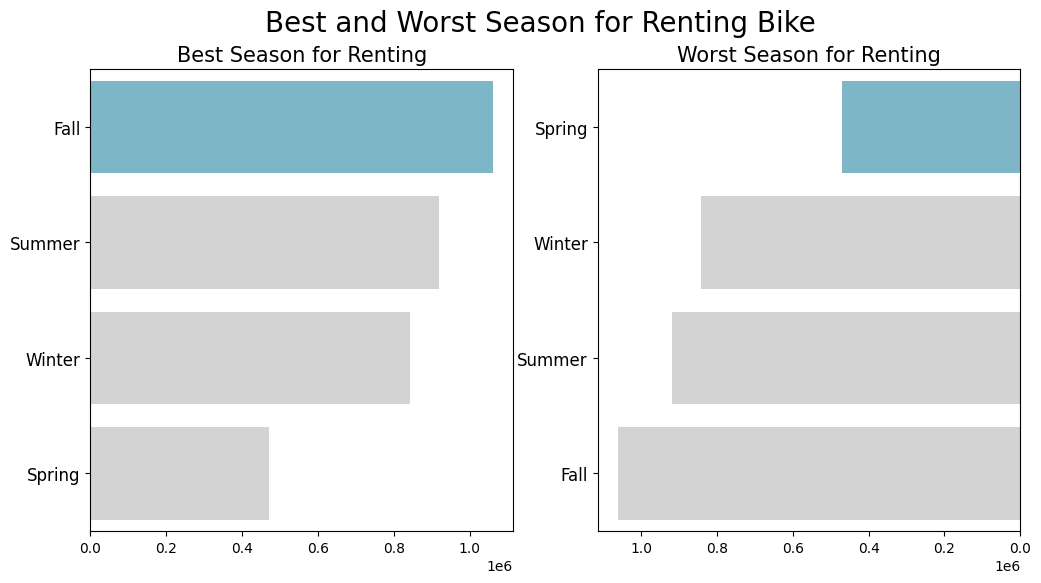

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_count", y="season", data=season_rent_df.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Season for Renting", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="total_count", y="season", data=season_rent_df.sort_values(by="total_count", ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Worst Season for Renting", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Season for Renting Bike", fontsize=20)
plt.show()

# Total of Registered Users Each Month from 2012 - 2013

In [ ]:
user_month_df = day_df.groupby("month").registered.sum().reset_index()
print(user_month_df)

    month  registered
0       1      122891
1       2      136389
2       3      184476
3       4      208292
4       5      256401
5       6      272436
6       7      266791
7       8      279155
8       9      275668
9      10      262592
10     11      218228
11     12      189343


In [ ]:
month_rename = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
user_month_df['month'] = user_month_df['month'].replace(month_rename)

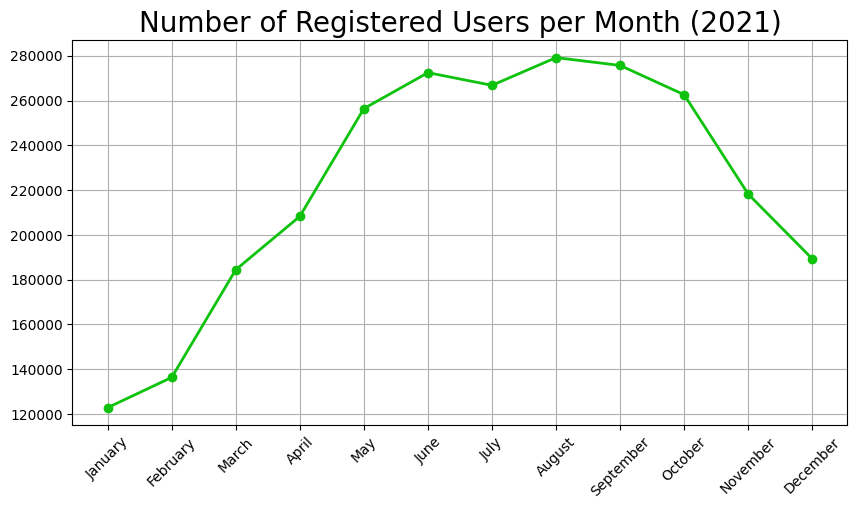

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(10, 5))
plt.plot(user_month_df["month"], user_month_df["registered"], marker='o', linewidth=2, color="#0ec20e")
plt.title("Number of Registered Users per Month (2021)", loc="center", fontsize=20)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

# 2012 vs 2013 Registered Users

In [ ]:
registered_user_df = day_df.loc[:, ['year', 'month', 'registered']]

In [ ]:
registered_user_df.head()

,year,month,registered
0,0,1,654
1,0,1,670
2,0,1,1229
3,0,1,1454
4,0,1,1518


In [ ]:
month_rename = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
registered_user_df['month'] = registered_user_df['month'].replace(month_rename)

In [ ]:
registered_user_df = registered_user_df.groupby(['year','month'])['registered'].sum().reset_index()

In [ ]:
registered_user_df.head(20)

,year,month,registered
0,0,April,72524
1,0,August,107849
2,0,December,78875
3,0,February,41973
4,0,January,35116
5,0,July,104889
6,0,June,112900
7,0,March,51219
8,0,May,104771
9,0,November,86573


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
registered_user_df = registered_user_df.sort_values(by=['year','month'],key=lambda x: x.map({month: i for i, month in enumerate(month_order)}))
registered_user_df = registered_user_df.reset_index(drop=True)

In [ ]:
registered_user_df.head()

,year,month,registered
0,0,January,35116
1,1,January,87775
2,0,February,41973
3,1,February,94416
4,0,March,51219


<ipython-input-382-a2b6a1002f6e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=registered_user_df, x='month', y='registered', hue='year', ci=None)


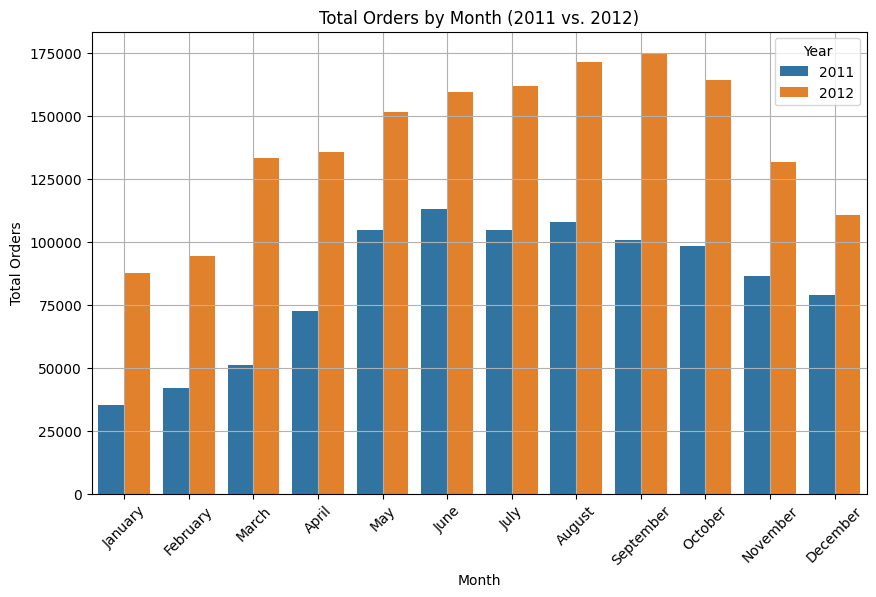

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=registered_user_df, x='month', y='registered', hue='year', ci=None)

plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders by Month (2011 vs. 2012)')
plt.legend(title='Year', labels=['2011', '2012'])
plt.xticks(rotation=45)
plt.grid()
plt.show()

# **Exporting CSV**

In [ ]:
day_df.to_csv("new_day_df.csv", index=False)